# Manual Trial-and-Error

In the current notebook we will explore some concepts through manual history-matching (or trial-and-error). Many of the concepts discussed here are explained in greater detail in *Applied Groundwater Modeling (2nd edition)* by Anderson et al. (2015). Here, we will "manually" adjust model parameter values, run the model, and then compare model outputs to measured values. This process is repeated until the modeller is satisfied with the fit between measured and simulated values.

Before we go any further, allow us to highlight that trial-and-error history matching is rarely, if ever, sufficent in a decision-support modelling context. It can be a useful **first-step** for history-matching, mostly because it provides a modeller with insight about the site and a model's response to parameter changes. In this way, it helps to develop a modeller's "hydrosense" - the intuitive understanding of how a model behaves. It can also provide a quick form of quality control on both the model setup as well as the reasonableness of the conceptual model.

These benefits notwithstanding, trial-and-error history matching is cumbersome and highly subjective. It is inaplicable in highly-parameterized contexts (we will see why this is important in other tutorials). Comprehensive testing and identification of all insensitive and correlated parameters is not feasible, and it cannot ensure that the best quantifiable fit has been achieved. 

In practice, more rigorous, automated trial-and-error methodologies are employed. These are the topics of subsequent tutorials.

**Key Point:** Trial-and-error history-matching is may provide some "soft" benefit to the modeller. It does not replace automated parameter estimation methods.


**References:**

>Anderson, Mary P., William W. Woessner, and Randall J. Hunt. 2015. *Applied Groundwater Modeling*. Applied Groundwater Modeling. 2nd ed. Elsevier. doi:10.1016/B978-0-08-091638-5.00001-8.




### 1. Admin

In the tutorial folder there is a file named `freyberg_trial_and_error.py`. It contains a series of functions that automate changing parameters, running the model and plotting outcomes. These make use of `flopy` and other libraries. You do not need to be familiar with these functions, only to follow along with what they are doing.

In [1]:
import freyberg_trial_and_error as te
#prepares some files before trial and error
te.get_model()

model files are in: freyberg_mf6


### 2. Trial and Error

The `te.update_par()` function loads the modified Freyberg model (see the "freyberg intro to model" notebook), updates parameters, runs the model and then plots simulated values against measured values.

The function automates updates to:

- hydraulic conductivty (k) for each of the three model layers.
- recharge. 

You can assign values of k to each layer through the respective `k1`,`k2` and `k3` arguments. You can adjust recharge by passing a value to the `rch_factor` argument. Recharge in the model is multipled by this factor. 

Scatter plots of measured *vs* simulated values of heads at observation wells and flows at the river are displayed. The root mean square error (RMSE) are also shown. Ideally, the aim of history-matching is to minimize RMSE.

Lastly, the model forecast of river headwater flux is compared to the "true" value. (Recall that we know the "truth" here because we generated it using the synthetic model. In the real-world, we don't know the "truth" before...after all, that is why we are building a model in the first place!) 

For example:

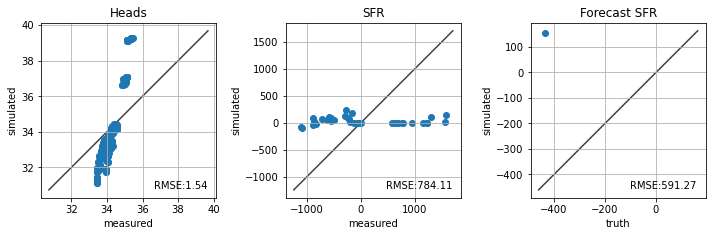

In [2]:
te.update_par(k1=1,     # K in layer 1
              k2=0.1,   # K in layer 2
              k3=1,     # K in layer 3
              rch_factor=0.35) # recharge is multiplied by rch_factor

### 3. Do It Yourself

Experiment with chaning values for `k1`,`k2`,`k3` and `rch_factor`. See if you can achieve a good fit between measured and simulated values of head and river flow (e.g. minimize RMSE). (**hint:** *at best RMSE should be about 0.25 for heads and 315 for SFR.*)

Whilst you are doing so, pay attention to the forecast of river flux. Does the forecast improve with a better fit with heads and/or SFR obsverations? Is it sensitive to some parameters more than others? 

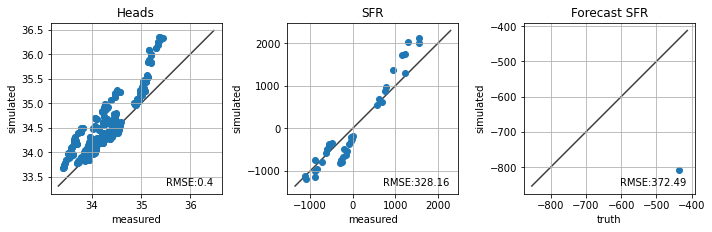

In [3]:
# change the parameer values untill you are happy with the fit
te.update_par(k1=10, k2=10, k3=10, rch_factor=1)

### 4. Non-Uniqueness and Correlated Parameters

...but hold on! What's this? If we assign a K of 30m/d throughout the model, results look very similar to what we achieve with k1=3, k2=0.3 and k3=30 (the latter is marginaly better). Oh dear. 

So which one is correct? Well looking at the forecast...hmm...looks like neither is correct! 

In [4]:
#te.update_par(k1=30, k2=30, k3=30, rch_factor=1)

In [5]:
#te.update_par(k1=3, k2=0.3, k3=30, rch_factor=1)

And what about when we adjust K and recharge at the same time? 

*(**hint:** this is particularily evident if you ignore the river flux observations and only try and fit heads. See the benefit of multiple types of observation data? Using heads & flows as calibration targets helps to constrain parameters which are informed by different sources of information. The same applies for secondary observations; e.g. vertical head differences for vertical conectivity and time-differences for storage or transport parameters.)*

In [6]:
#te.update_par(k1=30, k2=3, k3=3, rch_factor=0.5, sfrplot=False)

### 5. Structural Error

Can you find a parameter combination that results in a "correct" forecast? What do the corresponding fits with observation data look like? 

*(**hint:** try `te.update_par(k1=3, k2=.3, k3=30, rch_factor=0.8)`* 

In [9]:
#te.update_par(k1=30, k2=3, k3=3, rch_factor=0.5)

So...is history-matching a lie? It seems to make our model worse at making a prediction! 

Wel, in this case it does. This is because our model is *oversimplified*. We are introducing *structural error* by using a single parameter value for each model layer, ignoring the potential for parameter heterogeneity within each layer. We touched on this in the "intro to regression" notebook and we will revisit it again in other tutorials.

6. Final Remarks

Hopefully after this gruelling exercise you have learnt the value (and lack-thereof) of manual trial-and-error history-matching. We have seen that:

1. Decisions on which parameters to change, in what order and by how much is subjective and will be subject to each modeller's biases. Thus trial-and-error history matching is not provide a transparent and reproducible process. Nor does it provide a quantifiable "best fit" for a given model.
2. Here we adjusted 4 parameters. As we saw, this *oversimplified* parameterisation introduced structural error, biasing our prediction. History-matching such a model can actually harm its usefullness to support a decision. Increasing the number of parameters reduces this propensity for bias. But handling more parameters manually quickly becomes an impossible task.
3. We saw that certain combinations of parameters can provide similar, or even equal, fits with measured data. Manually identifying parameter correlation is challenging, to say the least. And, once identified, a modeller is forced to (subjectively) choose which parameters to fix, and which to adjust.
4. Perhaps most importantly, once again we saw that a good fit with measured data does not equate to a correct prediction. To be usefull in a decision-support context, prediction uncertainty must be characterized.
